In [2]:
pip install river

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 337.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 324.4 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 358.4 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:━━━━━━━━━━━━━━━━━━ 0/3 [scipy]
      Successfully uninstalled scipy-1.13.1━ 0/3 [scipy]
  Attempting uninstall: pandas━━━━━━━━━━━━━━━━━━ 0/3 [scipy]
    Found existing installation: pandas 2.2.2 0/3 [scipy]
    Uninstalling pandas-2.2.2:╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [pandas]
      Successfully uninstalled pandas-2.2.2━━━━━━━━━━━━━━━━━━━ 1/3 [pandas]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [river]32m2/3 [river]]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy

In [2]:
import pandas as pd
from river import drift
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Sort Data by time to simulate a realistic stream [cite: 10]
df = pd.read_csv('click_prediction.csv')
# Sorting by year and day ensures we process data chronologically
df = df.sort_values(by=['year', 'day_of_year']).reset_index(drop=True)

In [5]:
# 2. Initialize ADWIN with high sensitivity
# delta=0.002 is default. We lower it to 0.001 to catch subtle drifts.
adwin = drift.ADWIN(delta=0.01)
drifts = []

In [7]:
# 3. Simulate Data Stream
print("Analyzing stream for drift points...")
data_stream = df['age'].values

for i, val in enumerate(data_stream):
    adwin.update(val)
    if adwin.drift_detected:
        drifts.append(i)

Analyzing stream for drift points...


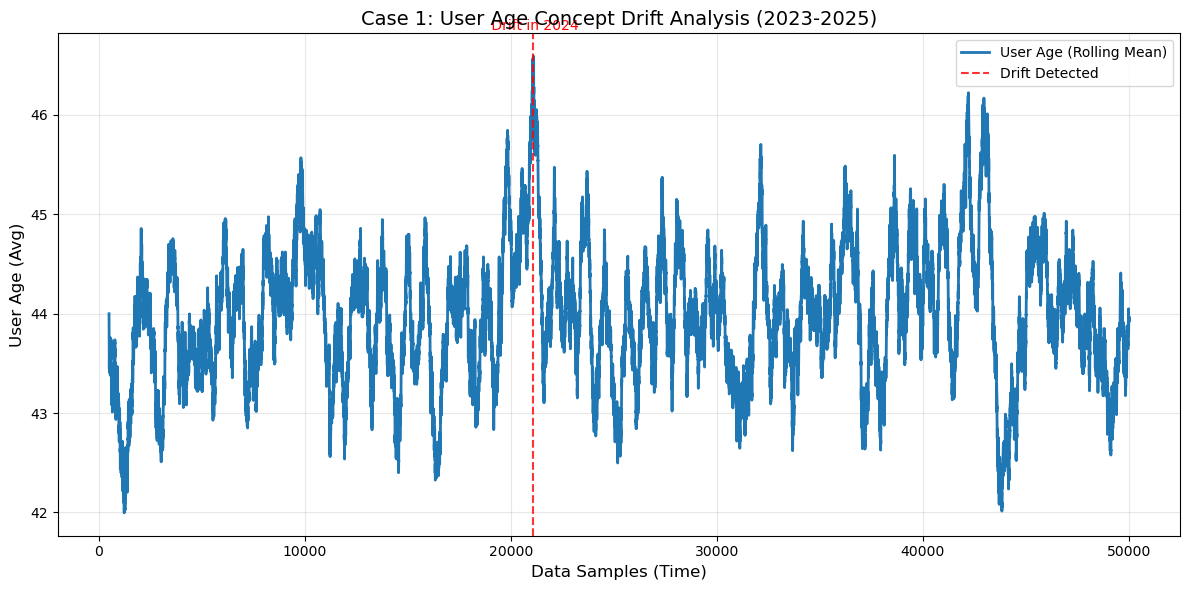

Total drifts detected: 1


In [8]:
# 4. Robust Visualization
# 'plt.close' clears any corrupted plots from memory
plt.close('all') 

# Explicitly set the figure size and DPI to prevent "Image too large" errors
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# Plot Rolling Mean (Smoothing the noise)
# We use .values to ensure matplotlib sees a simple array, not a complex Series
rolling_age = df['age'].rolling(window=500).mean()
ax.plot(rolling_age.values, label='User Age (Rolling Mean)', color='#1f77b4', linewidth=2)

# Plot Drift Points
if drifts:
    # We plot the first drift with a label, and the rest without
    for i, d in enumerate(drifts):
        label = 'Drift Detected' if i == 0 else None
        ax.axvline(x=d, color='red', linestyle='--', alpha=0.8, label=label)
    
    # Add a text annotation for the first drift
    first_drift_year = df.iloc[drifts[0]]['year']
    ax.text(drifts[0], ax.get_ylim()[1], f' Drift in {first_drift_year}', 
            color='red', ha='center', va='bottom', fontsize=10)

ax.set_title('Case 1: User Age Concept Drift Analysis (2023-2025)', fontsize=14)
ax.set_xlabel('Data Samples (Time)', fontsize=12)
ax.set_ylabel('User Age (Avg)', fontsize=12)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total drifts detected: {len(drifts)}")